Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
##Since Glucose, BloodPressure, SkinThickness and Insulin can not be zero.

In [12]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean()) 
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean()) 
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean()) 
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean()) 
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean()) 


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

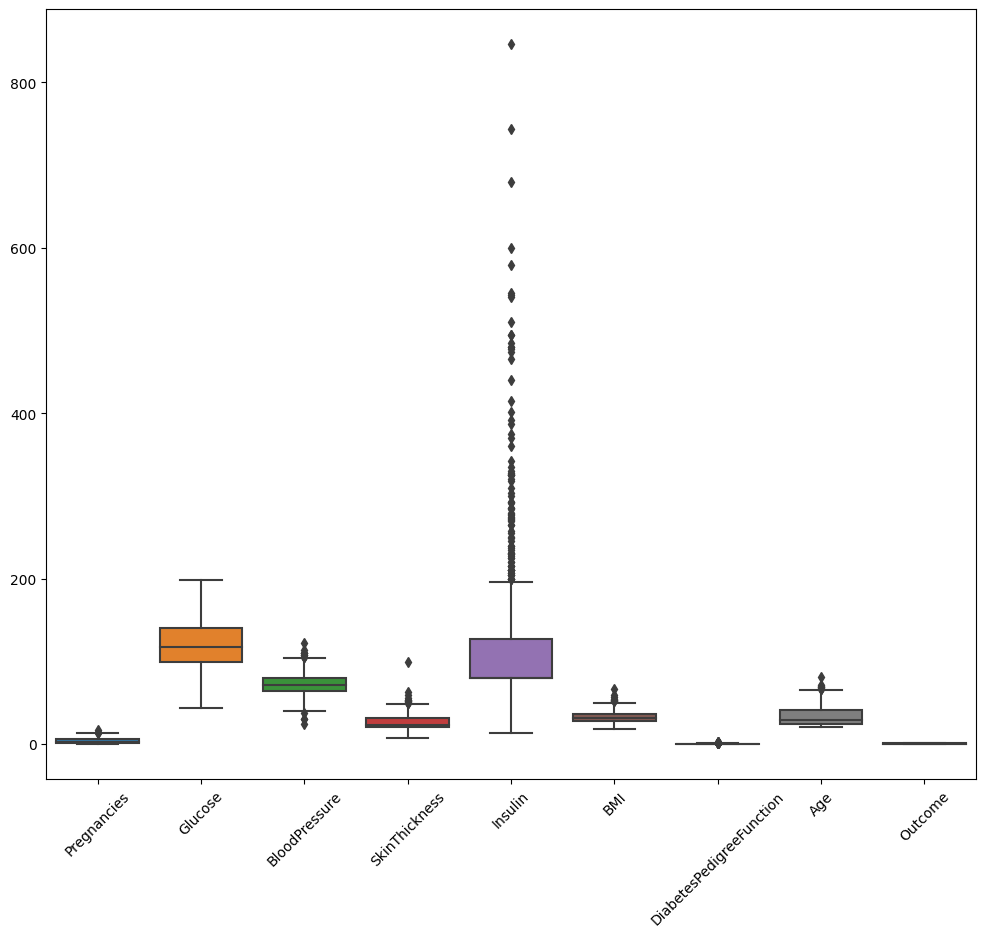

In [17]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sns.boxplot(data= df)

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#There is no missing value in the dataset and also categorical variables already in interger form i.e., 0 & 1.

# #But there is outliers in the datasets. let's remove them

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df[(df>=lower_bound) & (df<=upper_bound)]

In [22]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,NaN,33.0,1


In [23]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,768.000000,754.000000,756.000000,679.000000,760.000000,739.000000,759.000000,768.000000
mean,3.786649,121.681605,71.975718,26.114783,91.505162,32.200945,0.429832,32.805007,0.348958
std,3.278714,30.436016,10.993044,8.718790,33.893718,6.444224,0.249684,11.113182,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.356000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,94.000000,36.400000,0.587000,40.000000,1.000000
max,13.000000,199.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


In [24]:
#Now data has no outliers but have NaN values. let's fill them by mean imputation.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             754 non-null    float64
 3   SkinThickness             756 non-null    float64
 4   Insulin                   679 non-null    float64
 5   BMI                       760 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       759 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [26]:
df1.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               12
Insulin                     89
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [27]:
cleaned_df = df1.fillna(df1.mean())

In [28]:
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627000,50.0,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351000,31.0,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672000,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.429832,33.0,1


In [29]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [30]:
cleaned_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
cleaned_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.786649,121.681605,71.975718,26.114783,91.505162,32.200945,0.429832,32.805007,0.348958
std,3.270153,30.436016,10.892254,8.650316,31.866648,6.410529,0.244918,11.047789,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,71.975718,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,91.505162,36.300000,0.582250,40.000000,1.000000
max,13.000000,199.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


# #NOW DATASET is perfect and ready for model training.

In [32]:
#let's check boxplot.

<Axes: >

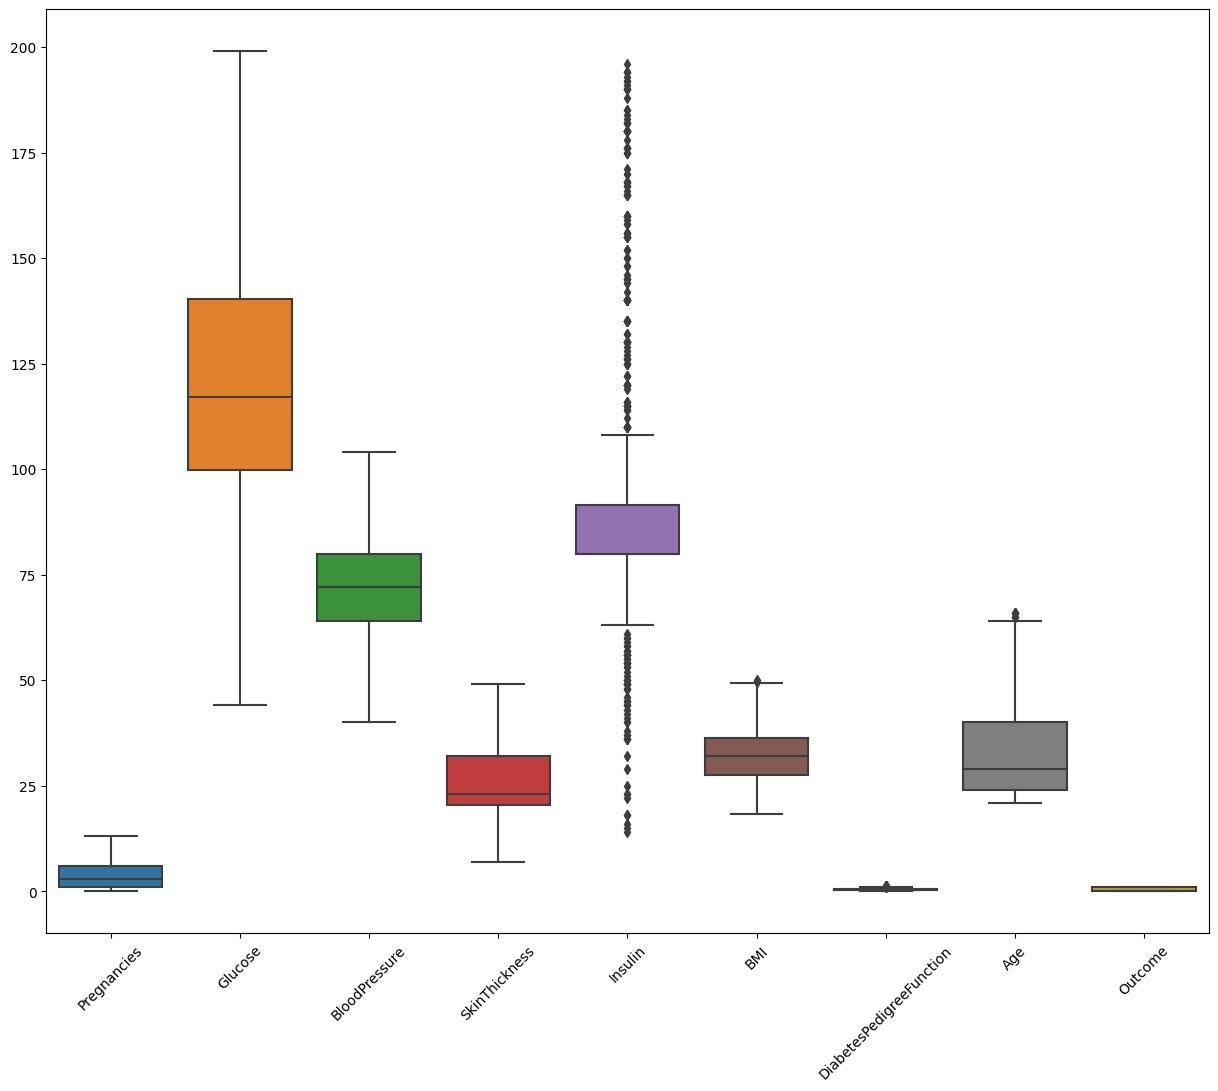

In [33]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=45)
sns.boxplot(data = cleaned_df)

In [34]:
cleaned_df.to_csv('diabetes_cleaned.csv')

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [35]:
#let's segregate independent and dependent variable

In [36]:
X = cleaned_df.drop(columns=['Outcome'])
y = cleaned_df['Outcome']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy') #entropy implements the ID3 algorithm
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

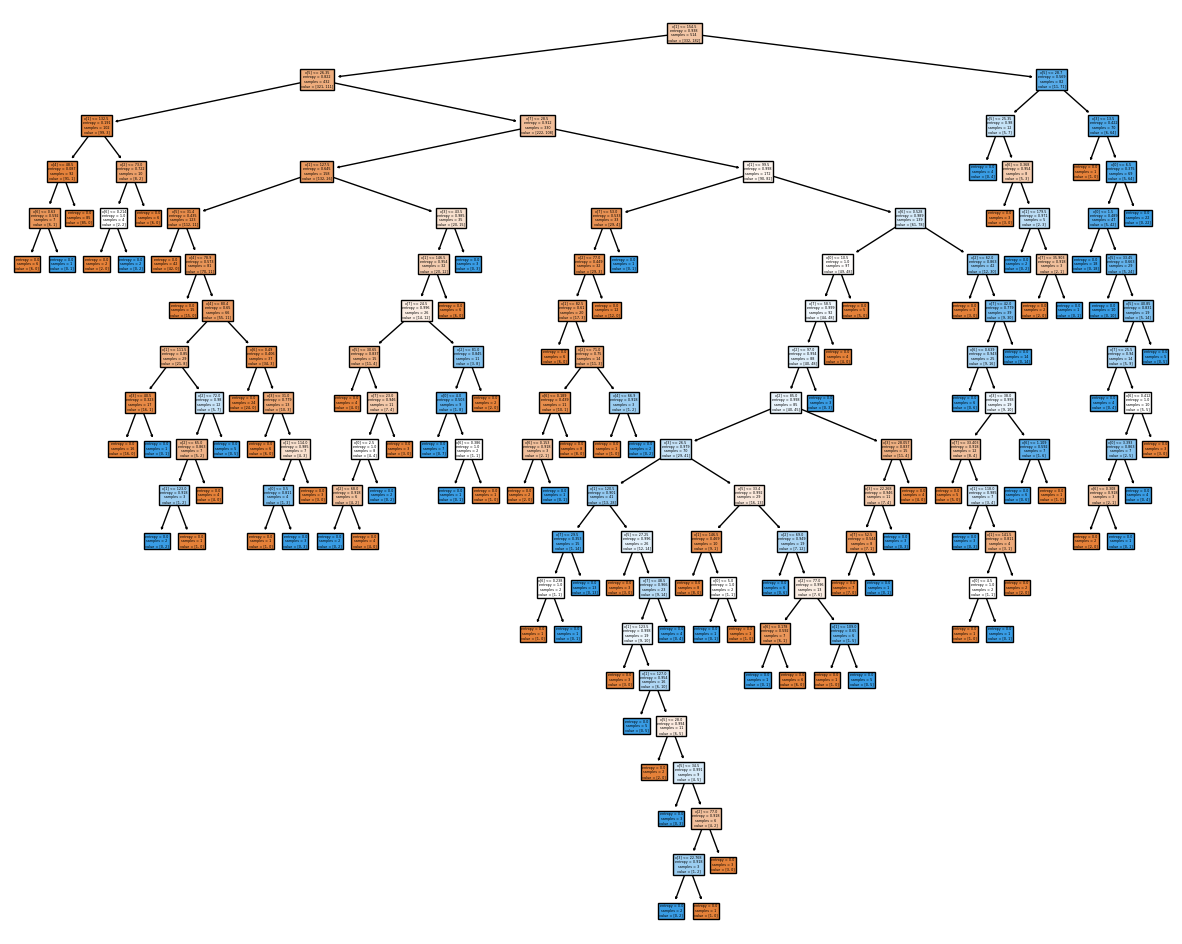

In [45]:
#let's visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled=True)
plt.show()

In [ ]:
# #Let's perform hyperparameter tuning and cross validation

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
parameter = {"criterion" :["gini", "entropy", "log_loss"],
             "splitter": ["best", "random"],
             "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             "max_features" : ["auto", "sqrt", "log2"]
            }

In [48]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [49]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [50]:
y_pred = clf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
score = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print(f"accuracy: {score}")
print(f"report:{report}")

accuracy: 0.7047244094488189
report:              precision    recall  f1-score   support

           0       0.76      0.79      0.77       161
           1       0.60      0.56      0.58        93

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.70      0.70      0.70       254



In [57]:
cm = confusion_matrix(y_pred, y_test)
cm
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

In [67]:
print(f"Confusion Matrix: {cm}")

Confusion Matrix: [[127  34]
 [ 41  52]]


In [60]:
TP,FP,FN,TN

(127, 34, 41, 52)

In [61]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_score = 2 * precision * recall /(precision+recall)

In [66]:
accuracy, precision , recall, F1_score

(0.7047244094488189,
 0.7888198757763976,
 0.7559523809523809,
 0.7720364741641338)

In [68]:
# #Let's plot the ROC Curve

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
print("AUC:", auc)

AUC: 0.673979830361317


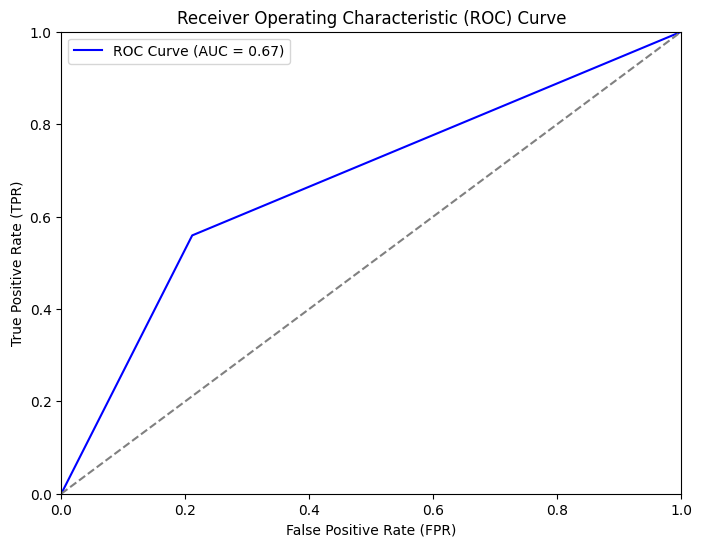

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [74]:
#Let's identify most important variables 


In [75]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'splitter': 'best'}

In [76]:
clf.best_score_

0.7587854559299447

In [77]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [78]:
clf.best_index_

238

In [79]:
#Let's visualize the tree


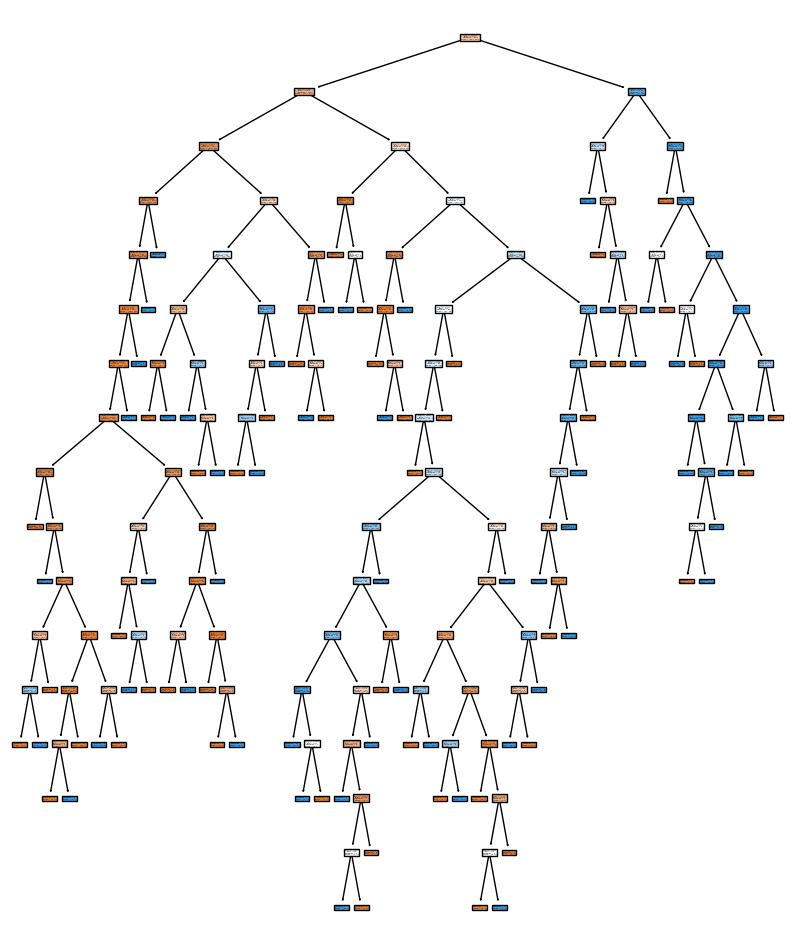

In [85]:
classifier.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(classifier,filled=True)
plt.show()

#Interpretation
Root Node: The topmost node that splits the dataset based on a feature.

Splits: Each internal node represents a decision based on a feature value. Follow the paths from the root to the leaves.

Leaves: Terminal nodes that make predictions. The color and value indicate the majority class in classification.

Samples: The number of samples in the node.

Gini Impurity or Entropy: Measures impurity or randomness. Lower values indicate more purity.

Value: The distribution of classes in the node.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [87]:
new_data = [[6,140.25,80,32,91.5,36.3,0.58,40]]
predicted_value = clf.predict(new_data)
print("Predicted Value:", predicted_value)






Predicted Value: [1]


Sensitivity analysis and scenario testing provide insights into how the model responds to changes in input variables and different scenarios. We can customize the code to specific problem and dataset for more comprehensive exploration of uncertainty and risks.